# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv('Loan Prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Cleaning Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
(data.Credit_History.isnull().sum()/data.shape[0])*100

8.143322475570033

As the maximium number of nulls which was found in Credit History column (50) percentage was less than 20% so,Dropping won't be risky 

In [7]:
#Dropping enteries with nulls 
data=data.dropna()

In [8]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
data=data.drop(["Loan_ID"],axis=1)

In [10]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


# Outliers

<AxesSubplot:>

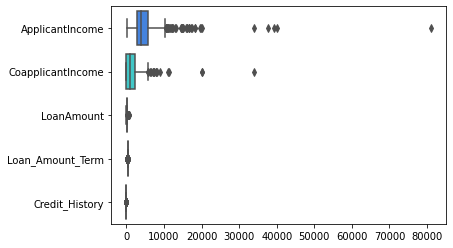

In [11]:
sns.boxplot(data=data,palette="rainbow",orient='h')

# Getting Lower and upper boundaries to eliminate the outliers

In [12]:
q1=data["ApplicantIncome"].quantile(0.25)
q3=data["ApplicantIncome"].quantile(0.75)

IQR=q3-q1
LowerBound=q1-(1.5*IQR)
UpperBound=q3+(1.5*IQR)


In [13]:
q1=data["CoapplicantIncome"].quantile(0.25)
q3=data["CoapplicantIncome"].quantile(0.75)

IQR=q3-q1
UpperBoundCo=q3+(1.5*IQR)

print(UpperBoundCo)

5633.125


# Dropping the Outliers

In [14]:
data["ApplicantIncome"]=data["ApplicantIncome"].drop(data[(data.ApplicantIncome<LowerBound)& (data.ApplicantIncome>UpperBound) ].index)
data["ApplicantIncome"].shape[0]

480

In [15]:
data["CoapplicantIncome"]=data["CoapplicantIncome"].drop(data[(data.CoapplicantIncome>UpperBound) ].index)
data["CoapplicantIncome"].shape[0]

480

## Visualization

As the some of the data columns is categorial so we will use the count plot. 
Using hue as 'Loan status'as it our main target 

<AxesSubplot:xlabel='Education', ylabel='count'>

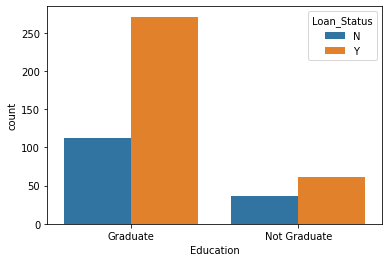

In [16]:
sns.countplot(x="Education",hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Married', ylabel='count'>

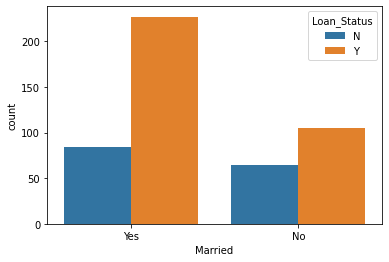

In [17]:
sns.countplot(x="Married",hue='Loan_Status',data=data)

## Converting categorical columns into numerical values and replacing strings with numbe

In [18]:
#From data info 'dependants' column type is an object contains string (3+) so it will be replaced by a number
data["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [19]:
data["Dependents"]=np.where(data["Dependents"]=="0",0,np.where(data["Dependents"]=="1",1,np.where(data["Dependents"]=="2",2,4)))
data["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [20]:
data["Gender"]=np.where(data["Gender"]=="Female",0,1)
data["Married"]=np.where(data["Married"]=="No",0,1)
data["Property_Area"]=np.where(data["Property_Area"]=="Urban",1,np.where(data["Property_Area"]=="Rural",2,3))
data["Self_Employed"]=np.where(data["Self_Employed"]=="Yes",1,0)
data["Education"]=np.where(data["Education"]=="Graduate",0,1)
data["Loan_Status"]=np.where(data["Loan_Status"]=="Y",1,0)

data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,2,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  475 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 64.9 KB


In [22]:
data=data.dropna()

Splitting Data into X(Features) and Y(Target Prediction)

In [23]:
X=data.drop(columns=['Loan_Status'],axis=1)
Y=data["Loan_Status"]

In [24]:
print(X.dtypes)
print(Y)

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object
1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 475, dtype: int64


## Splitting the dataset into the Training set and Test set

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 41)
print(X.shape,X_train.shape,X_test.shape)

(475, 11) (356, 11) (119, 11)


In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [27]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.69      0.41      0.51        27
           1       0.84      0.95      0.89        92

    accuracy                           0.82       119
   macro avg       0.77      0.68      0.70       119
weighted avg       0.81      0.82      0.81       119



## SVM

In [28]:
classifier=svm.SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [29]:
X_train_prediction=classifier.predict(X_train)
training_Accuaray=accuracy_score(X_train_prediction,y_train)
print(training_Accuaray * 100)

80.0561797752809


In [30]:
X_test_prediction=classifier.predict(X_test)
test_Accuaray=accuracy_score(X_test_prediction,y_test)
print("Accuracy :",test_Accuaray * 100)

Accuracy : 84.87394957983193


## Decision Tree

In [31]:
clf = DecisionTreeClassifier(max_depth = 3 , criterion = 'entropy', random_state = 0)
clf = clf.fit(X_train,y_train)
# Model Accuracy, how often is the classifier correct?
print(clf.score(X_test, y_test) * 100)

81.5126050420168


## KNN

In [32]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

# Calculate the accuracy of the model
print(knn.score(X_test, y_test) * 100)

76.47058823529412


**We calculated the accuracy with different models and we found that the highest accuracy was 84.87394957983193 in SVM model**

The percentage of married people in
semiurban area that obtained the loan

In [33]:
Married_semiUrban=data.loc[(data["Married"]==1)&(data["Property_Area"]==3)&(data["Loan_Status"]==1)]
len(Married_semiUrban.index)

103

In [34]:
LoanStatus=data.loc[(data["Loan_Status"]==1)]
len(LoanStatus)

331